Text(0, 0.5, 'y')

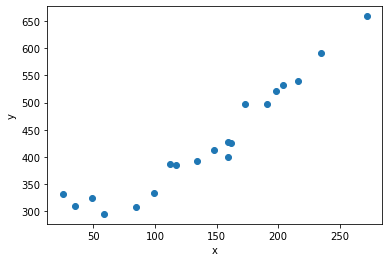

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('regression.csv')
x=data.iloc[:,0].values
y=data.iloc[:,-1].values

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [3]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_std =sc_x.fit_transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x1=x.reshape(-1,1)
x_std =sc_x.fit_transform(x1)

In [5]:
data.corr()

,X,y
X,1.000000,0.950392
y,0.950392,1.000000


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_std,y)
y_pred=lr.predict(x_std)
print('slope: %.3f'%lr.coef_[0])
print('intercept: %.3f' %lr.intercept_)

slope: 95.564
intercept: 428.600


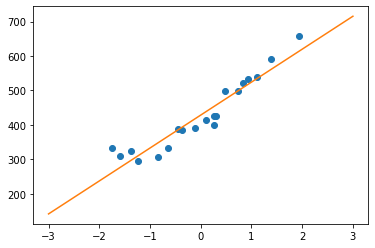

In [10]:
x=np.linspace(-3,3,100)
plt.plot(x_std,y,'o')
plt.plot(x,lr.intercept_+lr.coef_[0]*x)

In [ ]:
import sklearn.metrics as sm
mse = sm.mean_squared_error(y,y_pred)
print("RMSE:",np.sqrt(mse))
print("MAE",sm.mean_absolute_error(y,y_pred))
print("R^2",sm.r2_score(y,y_pred))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr= LinearRegression()
quadratic= PolynomialFeatures(degree=2)
x_quad= quadratic.fit_transform(x_std)

pr.fit(x_quad,y)
y_quad_pred=pr.predict(x_quad)

print("theta 1 ",pr.coef_[1])
print("theta 2 ",pr.coef_[2])
print("intercept ",pr.intercept_)

x=np.linspace(-3,3,100)
plt.plot(x_std,y,'o')
plt.plot(x,pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x*x)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr= LinearRegression()
quadratic= PolynomialFeatures(degree=3)
x_quad= quadratic.fit_transform(x_std)

pr.fit(x_quad,y)
y_quad_pred=pr.predict(x_quad)

print("theta 1 ",pr.coef_[1])
print("theta 2 ",pr.coef_[2])
print("theta 3 ",pr.coef_[3])
print("intercept ",pr.intercept_)

x=np.linspace(-3,3,100)
plt.plot(x_std,y,'o')
plt.plot(x,pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x*x+pr.coef_[3]*x*x*x)